# **Lab: Support Vector Machine**

In [1]:
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    precision_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import pandas as pd

## 1. Data preprocessing 

### a. Data generation

In [2]:
X, y = make_classification(
    n_samples=2000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=42
)

#### Data Visualisation

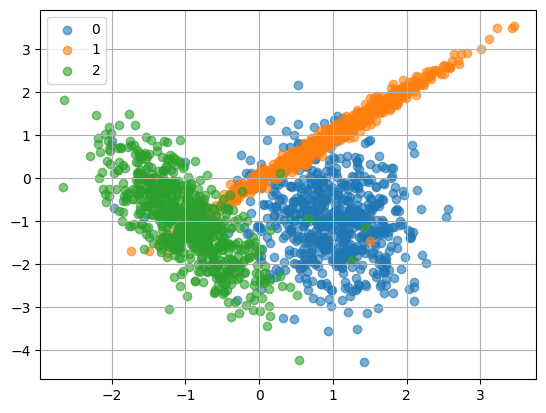

In [3]:
for i in np.unique(y):
    plt.scatter(X[y == i, 0], X[y == i, 1], alpha=0.6, label=f"{i}")

plt.legend()
plt.grid()
plt.show()

## 2. Data splitting

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=0)

## 3. Model training

In [5]:
model_linear = SVC(kernel="linear")

model_linear.fit(X_train,y_train)
pred_linear = model_linear.predict(X_test)

print("Metrics with linear model:")
print("\tAccuracy:", accuracy_score(y_test, pred_linear))

Metrics with linear model:
	Accuracy: 0.9316666666666666


In [6]:
model_rbf = SVC(kernel="rbf")

model_rbf.fit(X_train,y_train)

pred_rbf = model_rbf.predict(X_test)


print("Metrics with RBF model:")
print("\tAccuracy:", accuracy_score(y_test, pred_rbf))

Metrics with RBF model:
	Accuracy: 0.9333333333333333


## **4. Hyperparameter tunning**

#### hyperparameter:

- C : control the misclassifications rate
    - Low: prioritize wide margin, allowing more misclassifications (underfitting)
    - High: prioritize correct classification, allowing less misclassifications (overfitting)
- Gamma :
    - Low: faraway points influence the hyperplane
    - High: only nearby points can influence the hyperplane

In [7]:
hyperparameters_grid = {
    "C": [0.01, 0.1, 1, 10,],
    # "C": [0.001, 0.01, 0.1, 1, 10, 100,],
    "gamma": [0.01, 0.1, 1 ,"scale", "auto"],
    # "gamma": [0.001, 0.01, 0.1, 1, 10, "scale", "auto"],
    }

grid_search = GridSearchCV(model_rbf, hyperparameters_grid, cv=5)

In [8]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.01, 0.1, 1, 'scale', 'auto']})

In [9]:
best_param = grid_search.best_params_
print("Best parameters:", best_param)

Best parameters: {'C': 10, 'gamma': 1}


In [10]:
tuned_svm = SVC(kernel="rbf", **best_param)

In [11]:
tuned_svm.fit(X_train, y_train)

tuned_pred = tuned_svm.predict(X_test)


print("Metrics with RBF model:")
print("\tAccuracy:", accuracy_score(y_test, tuned_pred))

Metrics with RBF model:
	Accuracy: 0.94


<!-- ### Accuracy comparaison

#### Linear model:
    accuracy = 0.913

#### RBF model:
    accuracy = 0.9366

#### RBF model with tuned parameters:
    accuracy = 0.9366
    C = 100, gamma = 1 -->

## 5. Vector support Analysis

In [12]:
support_vectors = tuned_svm.support_vectors_
support_vectors_i = tuned_svm.support_
support_vectors_labels = y_train[support_vectors_i]
df_support_vectors_labels = pd.DataFrame(support_vectors_labels)
print(f"Number of support vectors: {len(support_vectors_labels)}")
print(f"Distribution of support vectors: \n{df_support_vectors_labels.value_counts()}")

Number of support vectors: 240
Distribution of support vectors: 
0
0    92
1    87
2    61
Name: count, dtype: int64


In [13]:
def plot_support_vectors(axis):
    axis.scatter(support_vectors[support_vectors_labels == 1,0], support_vectors[support_vectors_labels == 1,1], alpha=.4,)
    axis.scatter(support_vectors[support_vectors_labels == 0,0], support_vectors[support_vectors_labels == 0,1], alpha=.4,)
    axis.scatter(support_vectors[support_vectors_labels == 2,0], support_vectors[support_vectors_labels == 2,1], alpha=.4,)

#### **A point can become a support vector for several reasons:**
- Some points are located near the boundary


#### **The influence of a point on decision boundary**


## 6. Decision Boundary Visualization

In [ ]:
fig, axis = plt.subplots(1,3,figsize=(15, 5))

plot_decision_regions(X_test, y_test, clf=model_linear,ax=axis[0])
plot_support_vectors(axis[0])
axis[0].set_title("Linear Model")

plot_decision_regions(X_test, y_test, clf=model_rbf,ax=axis[1])
plot_support_vectors(axis[1])
axis[1].set_title("RBF Model")

plot_decision_regions(X_test, y_test, clf=tuned_svm,ax=axis[2])
plot_support_vectors(axis[2])
axis[2].set_title("RBF Model with tuned params")

plt.legend("SVM models")
plt.show()

## 7. Models evaluation

In [ ]:
print("Classification Report for linear model:")
pd.DataFrame(classification_report(y_test, pred_linear, output_dict=True))

Classification Report for linear model:


,0,1,2,accuracy,macro avg,weighted avg
precision,1.000000,0.891089,0.914027,0.931667,0.935039,0.936424
recall,0.855072,0.947368,0.995074,0.931667,0.932505,0.931667
f1-score,0.921875,0.918367,0.952830,0.931667,0.931024,0.931237
support,207.000000,190.000000,203.000000,0.931667,600.000000,600.000000


In [ ]:
print("Classification Report for RBF model:")
pd.DataFrame(classification_report(y_test, pred_rbf, output_dict=True))

Classification Report for RBF model:


,0,1,2,accuracy,macro avg,weighted avg
precision,1.000000,0.884058,0.926606,0.933333,0.936888,0.938453
recall,0.845411,0.963158,0.995074,0.933333,0.934547,0.933333
f1-score,0.916230,0.921914,0.959620,0.933333,0.932588,0.932710
support,207.000000,190.000000,203.000000,0.933333,600.000000,600.000000


In [ ]:
print("Classification Report for RBF model with tuned hyperparameters:")
pd.DataFrame(classification_report(y_test, tuned_pred, output_dict=True))

Classification Report for RBF model with tuned hyperparameters:


,0,1,2,accuracy,macro avg,weighted avg
precision,0.994475,0.901478,0.930556,0.94,0.942170,0.94340
recall,0.869565,0.963158,0.990148,0.94,0.940957,0.94000
f1-score,0.927835,0.931298,0.959427,0.94,0.939520,0.93962
support,207.000000,190.000000,203.000000,0.94,600.000000,600.00000


### Confusions matrix

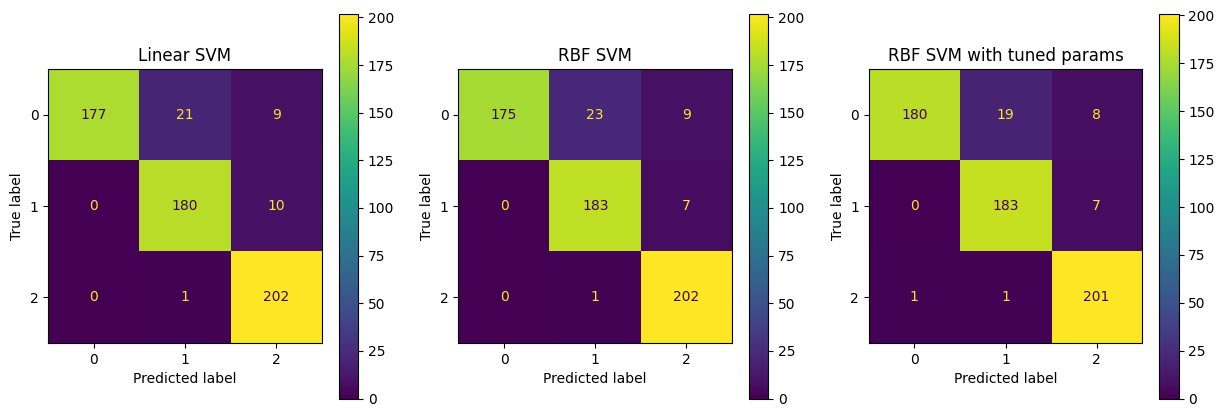

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test, y_pred=pred_linear)).plot(ax=axs[0])
axs[0].set_title("Linear SVM")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test, y_pred=pred_rbf)).plot(ax=axs[1])
axs[1].set_title("RBF SVM")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test, y_pred=tuned_pred)).plot(ax=axs[2])
axs[2].set_title("RBF SVM with tuned params")

plt.show()